In [1]:
import sys
import json
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.io.orca.config.executable = "C:/Users/agrasso/Anaconda3/envs/covid19/orca_app/orca.exe"

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.visualize.visualizer import ChoroplethMap

level = 'regioni'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img = f'{path_data}/imgs/mappe/{level}'
path_csv = f'{path_data}/csv'
path_geojson = f'{path_data}/geojson'

csv_in_name = f'{path_csv}/covid19-{level}.csv'
geojson_regions_name = f'{path_geojson}/Italy_NUTS_23.json'

In [2]:
# Read geojson NUTS 2 file
with open(geojson_regions_name, encoding='utf-8') as geojson_regions:
    json_regions = json.load(geojson_regions)
properties = json_regions['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [3]:
df_r = pd.read_csv(csv_in_name)
last_date = df_r.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
list(df_r.columns)
# totale_ospedalizzati = ricoverati_con_sintomi + terapia_intensiva
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# variazione_totale_positivi = totale_positivi(S) - totale_positivi(S - 1)
# totale_casi = totale_positivi + dimessi_guariti + deceduti

['data',
 'codice_regione',
 'denominazione_regione',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'ingressi_terapia_intensiva',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'codice_nuts_1',
 'codice_nuts_2',
 'popolazione',
 'regione',
 'ricoverati_area_non_critica',
 'posti_letto_area_non_critica',
 'ricoverati_terapia_intensiva',
 'posti_letto_terapia_intensiva',
 'posti_letto_terapia_intensiva_attivabili',
 'variazione_ricoverati_con_sintomi',
 'variazione_terapia_intensiva',
 'variazione_totale_ospedalizzati',
 'posti_disponibili_terapia_intensiva',
 'saturazione_terapia_intensiva',
 'variazione_isolamento_domiciliare',
 'variazione_nuovi_positivi',
 'nuovi_tamponi',
 'nuovi_casi_tes

In [4]:
# Define figures properties
fig_prop = {'title': last_date,
            'path_root': path_img,
            'nuovi_positivi': {'colorbar_title': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
            'terapia_intensiva': {'colorbar_title': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
            'saturazione_terapia_intensiva': {'colorbar_title': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
            'totale_ospedalizzati': {'colorbar_title': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
            'variazione_nuovi_positivi': {'colorbar_title': 'Variazione nuovi positivi', 'file_name': 'variazione_nuovi_positivi'},
            'variazione_terapia_intensiva': {'colorbar_title': 'Variazione terapia intensiva', 'file_name': 'variazione_terapia_intensiva'},
            'variazione_totale_ospedalizzati': {'colorbar_title': 'Variazione totale ospedalizzati', 'file_name': 'variazione_totale_ospedalizzati'},
            'np_su_nt': {'colorbar_title': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'}}

In [5]:
# Construct object with dataframe and geojson data
cm = ChoroplethMap(df=df_r,
                   geo_map=json_regions,
                   geo_col='denominazione_regione',
                   geo_prop='properties.reg_name',
                   fig_prop=fig_prop)

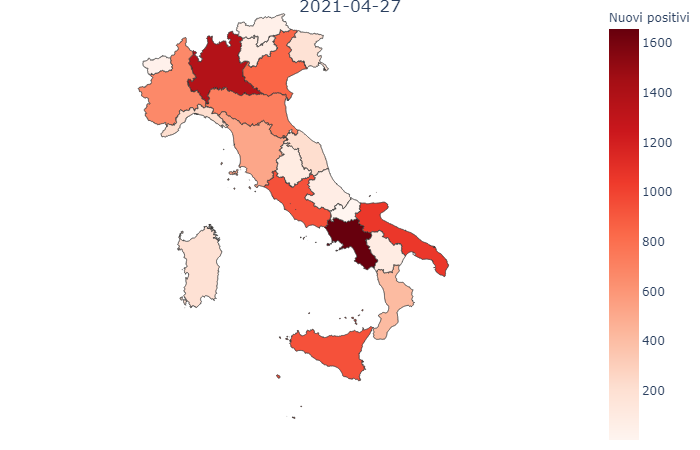

In [6]:
# New positives
col = 'nuovi_positivi'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

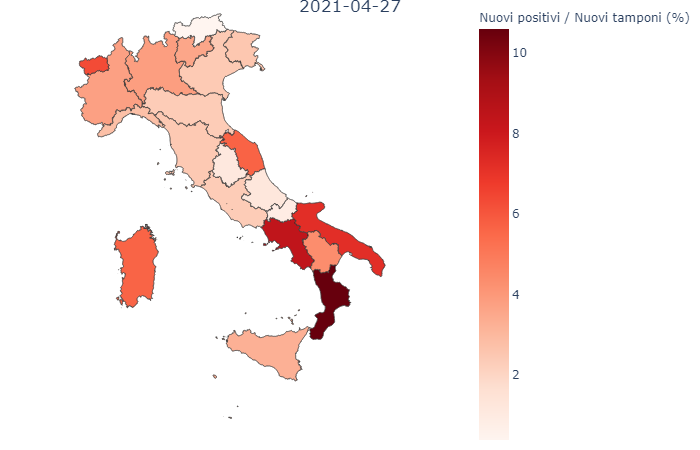

In [7]:
# New positives on new swabs
col = 'np_su_nt'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

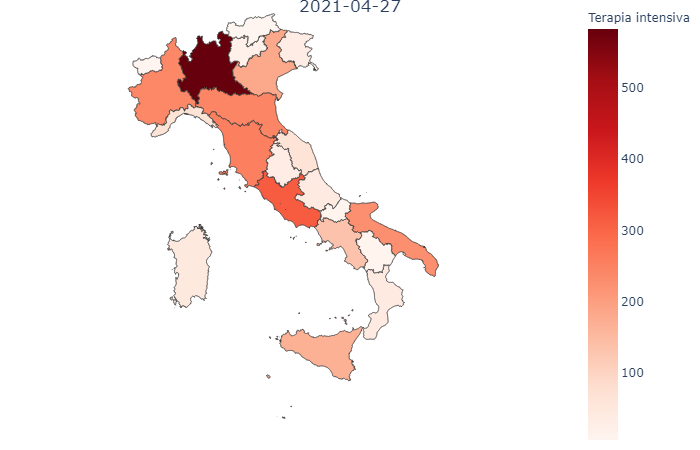

In [8]:
# Positives in ICU
col = 'terapia_intensiva'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

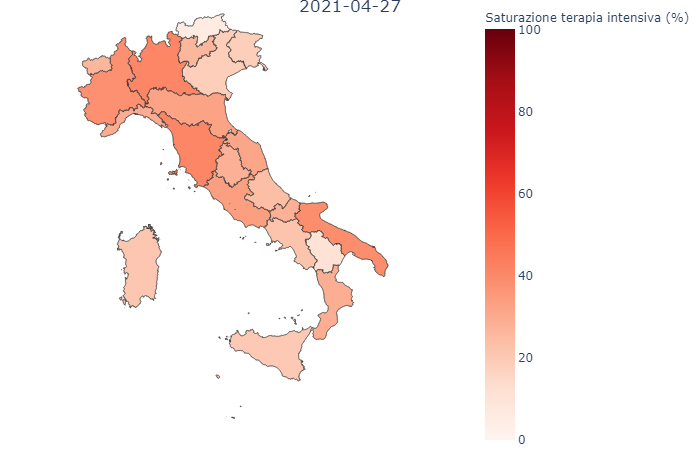

In [9]:
# ICU saturation
col = 'saturazione_terapia_intensiva'
fig = cm.draw_map(col=col, zmin=0, zmax=100)
cm.save(fig=fig, col=col)

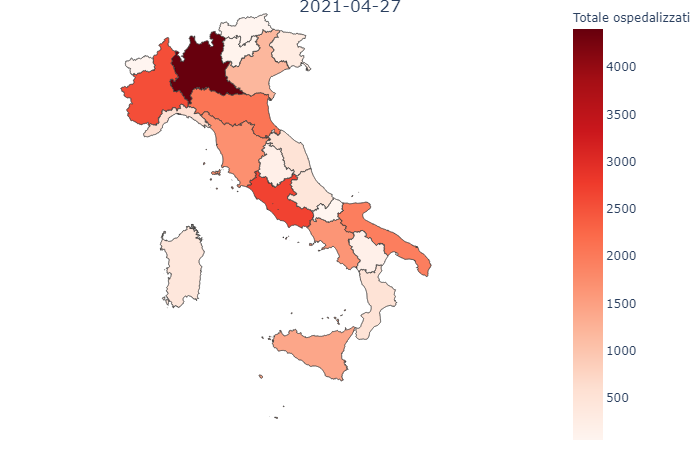

In [10]:
# Hospitalized positives
col = 'totale_ospedalizzati'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

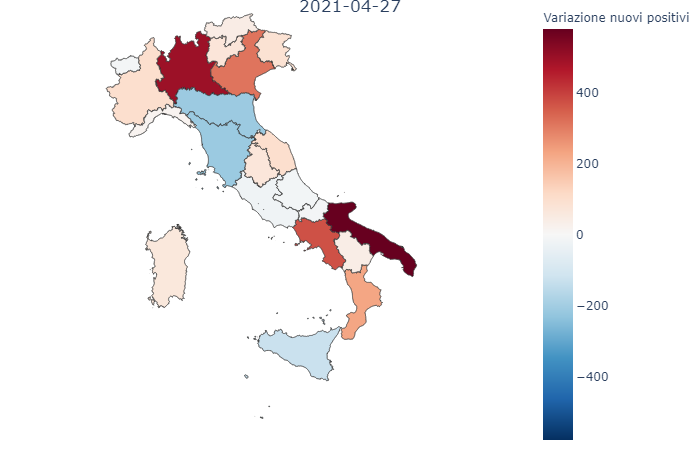

In [11]:
# Variation of new positives with respect to the day before
col = 'variazione_nuovi_positivi'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)

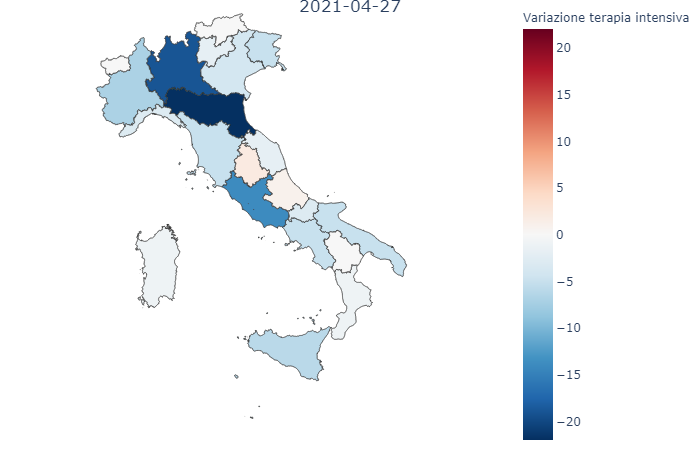

In [12]:
# Variation of positives in ICU with respect to the day before
col = 'variazione_terapia_intensiva'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)

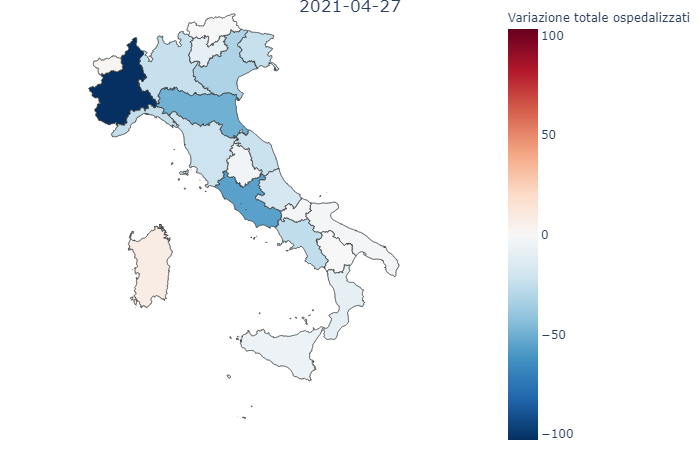

In [13]:
# Variation of hospitalized positives with respect to the day before
col = 'variazione_totale_ospedalizzati'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)